## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [673]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('kc_house_data.csv')

print(df.isna().sum())
print(df.info())
print(len(df))
print(df.shape)
print(df.head())

'''
early observation on the data set
1. sqft_basement is an object. should be int/float
2. the problematic columns with NA need to have a closer look: waterfront, view, and yr_renovated
'''

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 no

'\nearly observation on the data set\n1. sqft_basement is an object. should be int/float\n2. the problematic columns with NA need to have a closer look: waterfront, view, and yr_renovated\n'

In [674]:
#sqft_basement
#when try to convert 'sqft_basement' to int, decoder suggested that there are ? in the dataset. need to check what % it is of the whole dataset
print( 'sqft_basement with ? is', round(len(df[df.sqft_basement=='?'])/len(df)*100,2), '% of the data')

#given it is 2.1% with ?. we can forget about sqft_basement with ?
df_mod=df[(df.sqft_basement!='?')]

#sqft basement is an object in the original database. need to convert to int'
df_mod['sqft_basement']=pd.to_numeric(df_mod['sqft_basement'])
#check if it worked
df_mod.info()

sqft_basement with ? is 2.1 % of the data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(9), int64(11), o

/Users/Alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [675]:
#waterfront: appears to be binary inputs
print(df.waterfront.unique())
#10% of the data is NaN. too many to lose if we choose to drop them
df_waterfront=df[(df.waterfront==1)]
len(df_waterfront)
df_na_waterfront=df[(df.waterfront.isna())]
len(df_na_waterfront)
print(len(df_waterfront)/(len(df.waterfront)-len(df_na_waterfront)))
#0.75% of the property is waterfront. assume all the NA is non-waterfront. change in df_mod
df_mod.waterfront.fillna(value=0, inplace=True)
#check result
df_mod.waterfront.isna().sum()
#categorical 
df_mod.waterfront=df_mod.waterfront.astype('category')

[nan  0.  1.]
0.007595858696217679


/Users/Alex/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Alex/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [676]:

#only 63 NaN for df.view, we should drop them in our new modified dataset
df_mod=df_mod[(df_mod.view.isna()==False)]
len(df_mod)
#view should be a categorical feature
df_mod.view=df_mod.view.astype('category')

In [677]:
#yr_renovated & yr_built. assume the data was collected in 2015
df_mod.yr_built=2015-df.yr_built+1

df_mod.yr_renovated.describe()
#given all the data in the quadrants are 0, it tells us that majority of the numbers are 0. let's find out how many has been renovated
sum(i>0 for i in df_mod.yr_renovated)
#722 out of 21082 has been renovated. we will make yr_renovated a binary categarical data
df_mod.yr_renovated= np.where(df_mod.yr_renovated != 0, 1, 0)
df_mod.yr_renovated=df_mod.yr_renovated.astype('category')
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
id               21082 non-null int64
date             21082 non-null object
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null category
view             21082 non-null category
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null category
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: category(3), float64(6), int64(11), object(1)
memory usage: 3.1

In [678]:

#condition should also be categorical
df_mod.condition = df_mod.condition.astype('category')

#floors should be categorical
df_mod.floors= df_mod.floors.astype('category')

#bedrooms should be categorical
df_mod.bedrooms= df_mod.bedrooms.astype('category')
#bathrooms should be categorical
df_mod.bathrooms= df_mod.bathrooms.astype('category')

#seperate categorial columns as cat_col & ordinal_col
ordinal_col=['floors', 'view', 'condition','waterfront','yr_renovated', 'bedrooms', 'bathrooms']
df_mod_ordinal_col=df_mod[ordinal_col]
df_mod_ordinal_col.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 7 columns):
floors          21082 non-null category
view            21082 non-null category
condition       21082 non-null category
waterfront      21082 non-null category
yr_renovated    21082 non-null category
bedrooms        21082 non-null category
bathrooms       21082 non-null category
dtypes: category(7)
memory usage: 311.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a35d087f0>,
      dtype=object)

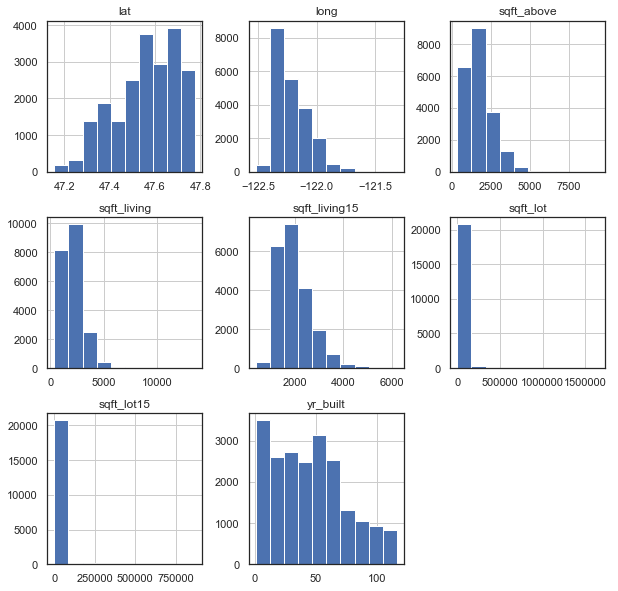

In [679]:

#df_mod_cont continuous variables. let's examine continuous variable and their distribution shape

cont_col=['sqft_living','sqft_lot','sqft_above', 'yr_built','lat','long','sqft_living15', 'sqft_lot15']
df_mod_cont=df_mod[cont_col]

df_mod_cont.hist(figsize=[10,10])


      price  sqft_living  sqft_lot  sqft_above  sqft_basement  sqft_living15  \
0 -0.041767    -0.132655 -0.043562   -0.099542      -0.060448      -0.123578   
1 -0.000295     0.083571 -0.012775    0.088718       0.022539      -0.039038   
2 -0.047264    -0.251236  0.027244   -0.231456      -0.060448       0.134336   
3  0.008364     0.008302 -0.058719   -0.135612       0.128349      -0.118181   
4 -0.003968    -0.034519  0.000804    0.009629      -0.060448      -0.016066   

   sqft_lot15  yr_built       lat      long  
0   -0.044730  0.139333 -0.078650  0.035818  
1   -0.002835  0.174116  0.257749  0.087156  
2    0.004652  0.330638  0.284782  0.015938  
3   -0.061707  0.052377 -0.063225  0.148397  
4   -0.005330 -0.138928  0.090857 -0.139923  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3356e5c0>,
      dtype=object)

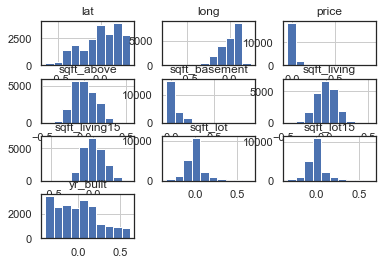

In [680]:
#normalize/log features 'sqft_living','sqft_lot','sqft_above', 'yr_built','lat','long','sqft_living15', 'sqft_lot15'
df_mod2=pd.DataFrame([])

df_mod2["price"]=(df_mod.price-df_mod.price.mean())/(df_mod.price.max()-df_mod.price.min())
sqft_livinglog=np.log(df_mod.sqft_living)
df_mod2["sqft_living"]=(sqft_livinglog -sqft_livinglog.mean())/(sqft_livinglog.max()-sqft_livinglog.min())
sqft_lotlog=np.log(df_mod.sqft_lot)
df_mod2["sqft_lot"]=(sqft_lotlog - sqft_lotlog.mean())/(sqft_lotlog.max()-sqft_lotlog.min())
sqft_abovelog=np.log(df_mod.sqft_above)
df_mod2["sqft_above"]=(sqft_abovelog -sqft_abovelog.mean())/(sqft_abovelog.max()-sqft_abovelog.min())

df_mod2["sqft_basement"]=(df_mod.sqft_basement -df_mod.sqft_basement.mean())/(df_mod.sqft_basement.max()-df_mod.sqft_basement.min())

sqft_living15log=np.log(df_mod.sqft_living15)
df_mod2["sqft_living15"]=(sqft_living15log-sqft_living15log.mean())/(sqft_living15log.max()-sqft_living15log.min())
sqft_lot15log=np.log(df_mod.sqft_lot15)
df_mod2["sqft_lot15"]=(sqft_lot15log-sqft_lot15log.mean())/(sqft_lot15log.max()-sqft_lot15log.min())

df_mod2["yr_built"]=(df_mod.yr_built-df_mod.yr_built.mean())/(df_mod.yr_built.max()-df_mod.yr_built.min())
latlog=np.log(df_mod.lat)
df_mod2["lat"]=(latlog-latlog.mean())/(latlog.max()-latlog.min())
longlog=np.log(abs(df_mod.long))
df_mod2["long"]=(longlog-longlog.mean())/(longlog.max()-longlog.min())
print(df_mod2.head())
df_mod2.hist()


In [681]:
#combine with ordinal_col
df_mod2=pd.concat([df_mod_ordinal_col,df_mod2], axis=1)

In [682]:
df_mod2.head()

,floors,view,condition,waterfront,yr_renovated,bedrooms,bathrooms,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_built,lat,long
0,1.0,0.0,3,0.0,0,3,1.00,-0.041767,-0.132655,-0.043562,-0.099542,-0.060448,-0.123578,-0.044730,0.139333,-0.078650,0.035818
1,2.0,0.0,3,0.0,1,3,2.25,-0.000295,0.083571,-0.012775,0.088718,0.022539,-0.039038,-0.002835,0.174116,0.257749,0.087156
2,1.0,0.0,3,0.0,1,2,1.00,-0.047264,-0.251236,0.027244,-0.231456,-0.060448,0.134336,0.004652,0.330638,0.284782,0.015938
3,1.0,0.0,5,0.0,0,4,3.00,0.008364,0.008302,-0.058719,-0.135612,0.128349,-0.118181,-0.061707,0.052377,-0.063225,0.148397
4,1.0,0.0,3,0.0,0,3,2.00,-0.003968,-0.034519,0.000804,0.009629,-0.060448,-0.016066,-0.005330,-0.138928,0.090857,-0.139923


Now, deal with zipcode: 

In [683]:
df_mod.zipcode.describe()
print(len(df_mod.zipcode.unique()))
#there are 70 unique postcodes. having them as categorical and dummies is not practical. looking at the percentile, 
#only few of them are very expensive, and most of them is in the middle of 25 to 75 percentile. 
#hence, group them by average of price of houses in any given postcode into 3 category groups: 1, 2,and 3.

df_zipcode=pd.DataFrame(df_mod.groupby('zipcode')['price'].mean())
print(df_zipcode.describe())
df_zipcode.head()


70
              price
count  7.000000e+01
mean   5.604604e+05
std    3.006211e+05
min    2.345127e+05
25%    3.538491e+05
50%    4.903816e+05
75%    6.466542e+05
max    2.135612e+06


,price
zipcode,
98001,2.814788e+05
98002,2.345127e+05
98003,2.949962e+05
98004,1.359437e+06
98005,8.102914e+05


zipcode suggested there are few zipcodes are very expensive, and few very cheap, but rest is in the middle. so we are going to make it into 3 (1,2,3) groups with threshhold of <=300k, 650k, >=650k.

In [684]:
#group 1 is for average value of less than 350k (25 percentile), 2 is for average value less than 650k (75 percentile)
# group 3 is for top 25 percentile of 650k and above
def zip_cat(zip):
    if zip<350000:
        return 1
    elif zip<650000:
        return 2
    else:
        return 3


In [685]:

df_mod2['zipcode']=df_mod['price'].map(zip_cat)
#zipcode should be a categorical feature. 
df_mod2.zipcode=df_mod2.zipcode.astype('category')
df_mod2.head()


,floors,view,condition,waterfront,yr_renovated,bedrooms,bathrooms,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_built,lat,long,zipcode
0,1.0,0.0,3,0.0,0,3,1.00,-0.041767,-0.132655,-0.043562,-0.099542,-0.060448,-0.123578,-0.044730,0.139333,-0.078650,0.035818,1
1,2.0,0.0,3,0.0,1,3,2.25,-0.000295,0.083571,-0.012775,0.088718,0.022539,-0.039038,-0.002835,0.174116,0.257749,0.087156,2
2,1.0,0.0,3,0.0,1,2,1.00,-0.047264,-0.251236,0.027244,-0.231456,-0.060448,0.134336,0.004652,0.330638,0.284782,0.015938,1
3,1.0,0.0,5,0.0,0,4,3.00,0.008364,0.008302,-0.058719,-0.135612,0.128349,-0.118181,-0.061707,0.052377,-0.063225,0.148397,2
4,1.0,0.0,3,0.0,0,3,2.00,-0.003968,-0.034519,0.000804,0.009629,-0.060448,-0.016066,-0.005330,-0.138928,0.090857,-0.139923,2


In [686]:
df_mod2.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_built,lat,long
count,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04
mean,-4.734655e-19,1.804451e-14,-5.241334e-15,3.146211e-14,1.004728e-16,3.635297e-14,-5.854184e-15,-1.155486e-16,-7.494440e-13,6.579665e-12
std,4.811497e-02,1.177756e-01,1.117924e-01,1.319547e-01,9.170288e-02,1.192810e-01,1.126622e-01,2.549837e-01,2.226036e-01,1.165575e-01
min,-6.064640e-02,-4.548215e-01,-3.394195e-01,-4.579339e-01,-6.044813e-02,-5.649200e-01,-3.448921e-01,-3.824058e-01,-6.517507e-01,-7.474131e-01
25%,-2.863381e-02,-7.927591e-02,-5.773106e-02,-9.434781e-02,-6.044813e-02,-8.492307e-02,-5.895622e-02,-2.258840e-01,-1.427551e-01,-7.356983e-02
50%,-1.184032e-02,1.123196e-03,-6.465293e-03,-1.327172e-02,-6.044813e-02,-8.058614e-03,-3.071185e-03,-3.457967e-02,1.931155e-02,1.345283e-02
75%,1.374352e-02,8.140045e-02,3.560903e-02,9.436239e-02,5.573444e-02,8.261539e-02,3.580268e-02,1.654203e-01,1.892422e-01,9.460656e-02
max,9.393536e-01,5.451785e-01,6.605805e-01,5.420661e-01,9.395519e-01,4.350800e-01,6.551079e-01,6.175942e-01,3.482493e-01,2.525869e-01


/Users/Alex/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


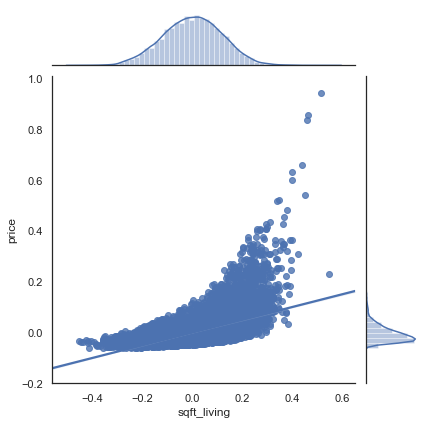

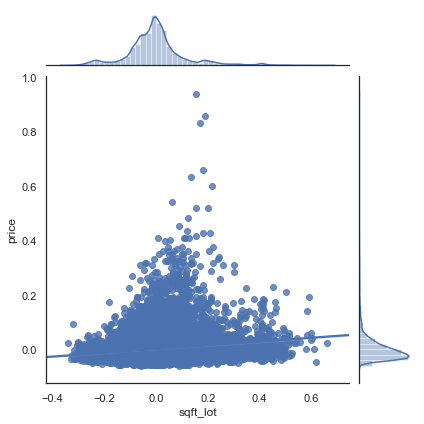

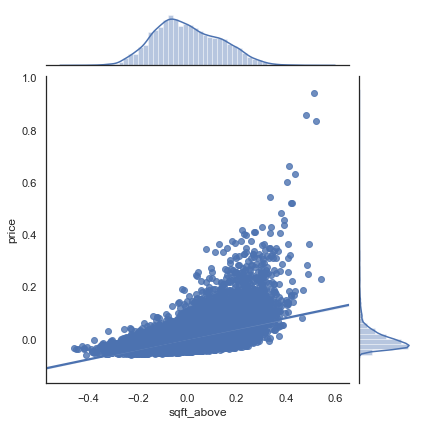

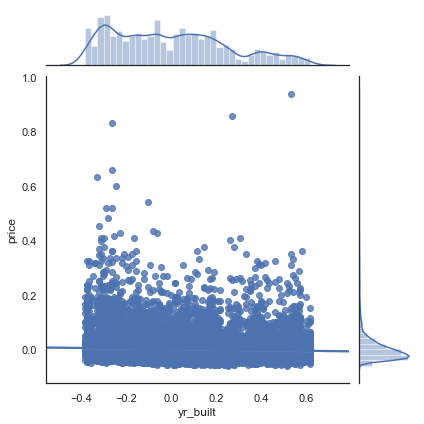

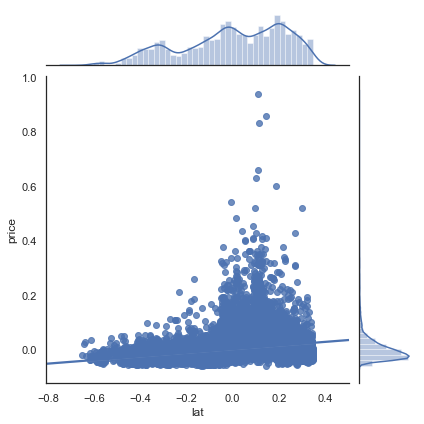

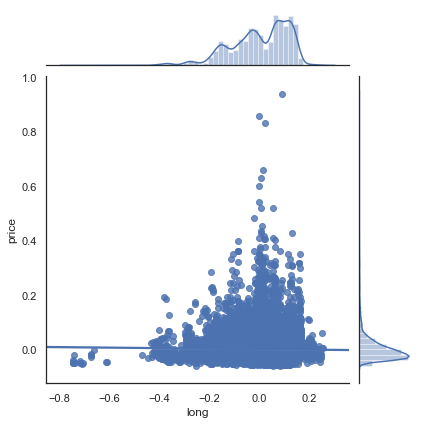

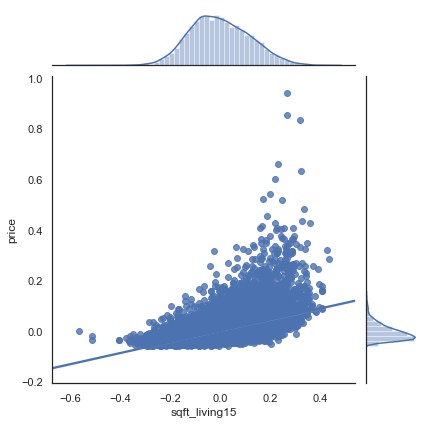

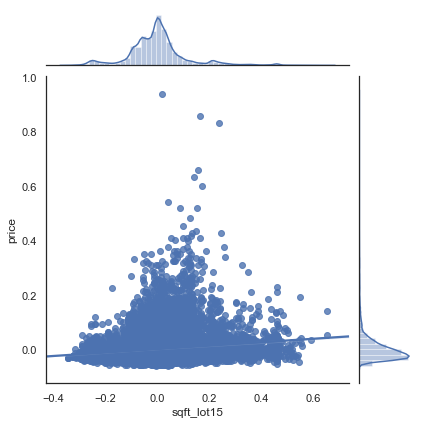

In [687]:
for col in cont_col:
    sns.jointplot(x=col, y="price", data=df_mod2, kind = 'reg')
#the graphs below sugests:
# sqft_living: there is a clear linear relationship between price and sqft_living, slightly skewed long tail normal graph
# sqft_lot: some linear relationship, but heavily long tail distribution
# sqft_above: linear relationship with long tail distribution, this is expected given high correlation with sqft_living
# yr_built: very little relationship to price, distribution is not normal
# lat: some relationship, not normal distribution, a hint of shape
# long: no obvious relationship, not normal distribution, a hint of shape
# sqft_living15: there is a linear relationship, few outliars, otherwise, roughly a normal shape
# sqft_lot15: non-zero, but little linear relationship, huge std deviation. 

In [688]:
df_mod2.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_built,lat,long
count,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04
mean,-4.734655e-19,1.804451e-14,-5.241334e-15,3.146211e-14,1.004728e-16,3.635297e-14,-5.854184e-15,-1.155486e-16,-7.494440e-13,6.579665e-12
std,4.811497e-02,1.177756e-01,1.117924e-01,1.319547e-01,9.170288e-02,1.192810e-01,1.126622e-01,2.549837e-01,2.226036e-01,1.165575e-01
min,-6.064640e-02,-4.548215e-01,-3.394195e-01,-4.579339e-01,-6.044813e-02,-5.649200e-01,-3.448921e-01,-3.824058e-01,-6.517507e-01,-7.474131e-01
25%,-2.863381e-02,-7.927591e-02,-5.773106e-02,-9.434781e-02,-6.044813e-02,-8.492307e-02,-5.895622e-02,-2.258840e-01,-1.427551e-01,-7.356983e-02
50%,-1.184032e-02,1.123196e-03,-6.465293e-03,-1.327172e-02,-6.044813e-02,-8.058614e-03,-3.071185e-03,-3.457967e-02,1.931155e-02,1.345283e-02
75%,1.374352e-02,8.140045e-02,3.560903e-02,9.436239e-02,5.573444e-02,8.261539e-02,3.580268e-02,1.654203e-01,1.892422e-01,9.460656e-02
max,9.393536e-01,5.451785e-01,6.605805e-01,5.420661e-01,9.395519e-01,4.350800e-01,6.551079e-01,6.175942e-01,3.482493e-01,2.525869e-01


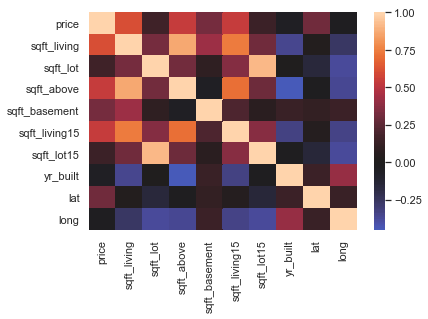

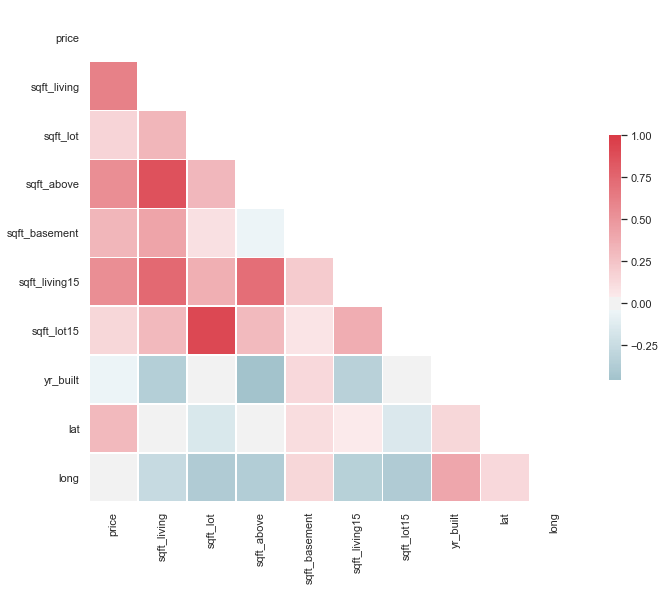

In [689]:
import seaborn as sns
sns.heatmap(df_mod2.corr(), center=0)

# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df_mod2.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [690]:
abs(df_mod2.corr())>0.75

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_built,lat,long
price,True,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,True,False,False,False
sqft_above,False,True,False,True,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False
sqft_living15,False,False,False,False,False,True,False,False,False,False
sqft_lot15,False,False,True,False,False,False,True,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False
lat,False,False,False,False,False,False,False,False,True,False
long,False,False,False,False,False,False,False,False,False,True


In [691]:
#we can see that bathrooms is highly correlated with sqft_living, sqft_living <>sqft_above, sqft_lot<>sqft_lot15
#let's look at the exact correlation to elimnating high multicollinearity
df_mod2.corr()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_built,lat,long
price,1.000000,0.612344,0.161382,0.543103,0.323018,0.545082,0.148050,-0.054849,0.307930,-0.022466
sqft_living,0.612344,1.000000,0.325868,0.865049,0.422463,0.746270,0.303010,-0.350929,0.040041,-0.256863
sqft_lot,0.161382,0.325868,1.000000,0.319006,0.093390,0.363135,0.918143,0.007207,-0.147386,-0.376991
sqft_above,0.543103,0.865049,0.319006,1.000000,-0.052324,0.712306,0.299202,-0.452716,-0.017852,-0.361868
sqft_basement,0.323018,0.422463,0.093390,-0.052324,1.000000,0.206385,0.080221,0.133178,0.110645,0.144722
sqft_living15,0.545082,0.746270,0.363135,0.712306,0.206385,1.000000,0.373537,-0.333047,0.045521,-0.336708
sqft_lot15,0.148050,0.303010,0.918143,0.299202,0.080221,0.373537,1.000000,-0.018896,-0.142036,-0.377593
yr_built,-0.054849,-0.350929,0.007207,-0.452716,0.133178,-0.333047,-0.018896,1.000000,0.148276,0.408904
lat,0.307930,0.040041,-0.147386,-0.017852,0.110645,0.045521,-0.142036,0.148276,1.000000,0.135087
long,-0.022466,-0.256863,-0.376991,-0.361868,0.144722,-0.336708,-0.377593,0.408904,0.135087,1.000000


In [692]:
#keep sqft_living, get rid off  sqft_above, because corr(sqft_living, price) is greater.
#sqft_living = sqft_above+sqft_basement. intuitively, one only needs two of the 3. 
#common sense eyeball scanning, the correlation of sqft_living15 and sqft_living is just below 0.75, but intuitively they should be quite well correlated. hence drop sqft_living15
df_mod2=df_mod2.drop(['sqft_above', 'sqft_lot15', 'sqft_living15'], axis=1)
df_mod2.head()

,floors,view,condition,waterfront,yr_renovated,bedrooms,bathrooms,price,sqft_living,sqft_lot,sqft_basement,yr_built,lat,long,zipcode
0,1.0,0.0,3,0.0,0,3,1.00,-0.041767,-0.132655,-0.043562,-0.060448,0.139333,-0.078650,0.035818,1
1,2.0,0.0,3,0.0,1,3,2.25,-0.000295,0.083571,-0.012775,0.022539,0.174116,0.257749,0.087156,2
2,1.0,0.0,3,0.0,1,2,1.00,-0.047264,-0.251236,0.027244,-0.060448,0.330638,0.284782,0.015938,1
3,1.0,0.0,5,0.0,0,4,3.00,0.008364,0.008302,-0.058719,0.128349,0.052377,-0.063225,0.148397,2
4,1.0,0.0,3,0.0,0,3,2.00,-0.003968,-0.034519,0.000804,-0.060448,-0.138928,0.090857,-0.139923,2


In [693]:
print(df_mod2.shape[1])

y=df_mod2.price
X=df_mod2.drop(["price"], axis=1)

X.shape


15


(21082, 14)

In [694]:
#looping through RFE with different n features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
r_list = []
adj_r_list = []
list_n=list(range(2,df_mod2.shape[1],1))
print(list_n)
for n in list_n:
    print('RFE n=', n)
    select_n=RFE(linreg, n_features_to_select=n)
    select_n=select_n.fit(X,np.ravel(y))
    selected_columns=X.columns[select_n.support_]
    linreg.fit(X[selected_columns],y)
    yhat=linreg.predict(X[selected_columns])
    SS_Residual=np.sum((y-yhat)**2)
    SS_Total=np.sum((y-np.mean(y))**2)
    r_squared=1-(float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared=1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
    r_list.append(r_squared)
    adj_r_list.append(adjusted_r_squared)


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
RFE n= 2
0.4206216068533044
0.42023658300064126
RFE n= 3
0.6030158683297333
0.6027520539354967
RFE n= 4
0.608990641428315
0.6087307975483129
RFE n= 5
0.6123409736692258
0.6120833562406109
RFE n= 6
0.6147644280868401
0.6145084211562479
RFE n= 7
0.6148600776793149
0.6146041343123196
RFE n= 8
0.629852071282337
0.6296060907914247
RFE n= 9
0.6430061380405205
0.6427688990379368
RFE n= 10
0.6454526899696498
0.6452170768144581
RFE n= 11
0.6454694266852956
0.6452338246524287
RFE n= 12
0.645767146220932
0.6455317420365247
RFE n= 13
0.645915198617075
0.6456798928203616
RFE n= 14
0.6459549836802619
0.6457197043225709


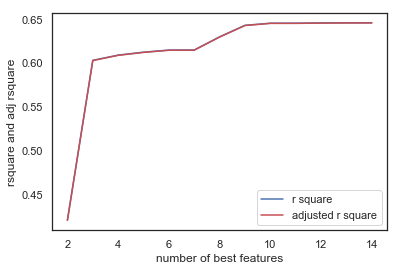

In [695]:
#map Rsquare and adjusted R square with different number of best feature variables
plt.plot(list_n,r_list,'b-', label='r square')
plt.plot(list_n,adj_r_list, 'r-', label='adjusted r square')
plt.xlabel('number of best features')
plt.ylabel('rsquare and adj rsquare')
plt.legend()
plt.show()


The difference between R^2 and adjusted R^2 is negligible, and seems to continue to be going up as we include more features. The graph above suggested marginal R square improvement starts to reduce at around 3 best features. it improves more at 13 features, but that's overfitting. 

In [696]:
#train test split with 20/80 split, and MSE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(2,df_mod2.shape[1],1))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = mean_squared_error(y_train, yhat_train)
    mse_test =mean_squared_error(y_test, yhat_test)
    print('RFE number of features: ', n)
    print(mse_train)
    print(mse_test)
    MSE_test.append(mse_test)
    MSE_train.append(mse_train)

RFE number of features:  2
0.0013227915225705665
0.0014165952176107212
RFE number of features:  3
0.0009082647995816439
0.000962949296532161
RFE number of features:  4
0.0008946777485664203
0.0009481341043310901
RFE number of features:  5
0.0008863533426223606
0.0009426574192643489
RFE number of features:  6
0.0008804251664268073
0.0009383681686042896
RFE number of features:  7
0.0008802046707363541
0.0009381427936420965
RFE number of features:  8
0.0008492189288607191
0.0008889874287827834
RFE number of features:  9
0.0008174019153504577
0.0008639549346442694
RFE number of features:  10
0.0008115734786387368
0.0008589301873606117
RFE number of features:  11
0.0008115723709010742
0.0008588749222423664
RFE number of features:  12
0.0008110918560273744
0.0008574501785038721
RFE number of features:  13
0.0008108470561330965
0.0008583449173353865
RFE number of features:  14
0.0008105474068104111
0.000857739790078685


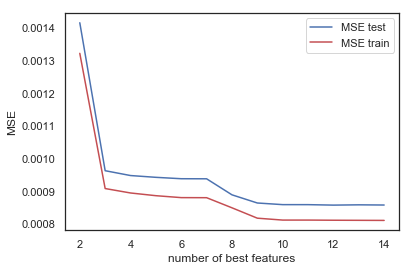

In [697]:
#plotting MSE with different n of best features
plt.plot(list_n,MSE_test,'b-', label='MSE test')
plt.plot(list_n,MSE_train, 'r-', label='MSE train')
plt.xlabel('number of best features')
plt.ylabel('MSE')
plt.legend()
plt.show()

Both MSE keeps improving when we add variables, but with diminishing marginal improvement at around 3 features.

In [698]:
select_n=RFE(linreg, n_features_to_select=3)
select_n=select_n.fit(X,np.ravel(y))
selected_columns=X.columns[select_n.support_]
print(selected_columns)
print(select_n.estimator_.coef_)

Index(['waterfront', 'sqft_living', 'zipcode'], dtype='object')
[0.11048574 0.11590094 0.03448235]


In [699]:
df_mod_3= df_mod2[['waterfront', 'sqft_living', 'zipcode']]
df_mod_3.waterfront=df_mod_3.waterfront.astype('int')
df_mod_3.zipcode=df_mod_3.zipcode.astype('int')

df_mod_3.head()

/Users/Alex/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,waterfront,sqft_living,zipcode
0,0,-0.132655,1
1,0,0.083571,2
2,0,-0.251236,1
3,0,0.008302,2
4,0,-0.034519,2


In [700]:
import statsmodels.api as sm
X2=sm.add_constant(df_mod_3)



In [701]:


model = sm.OLS(y,X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                 1.067e+04
Date:                Thu, 24 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:04:29   Log-Likelihood:                 43791.
No. Observations:               21082   AIC:                        -8.757e+04
Df Residuals:                   21078   BIC:                        -8.754e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0676      0.001    -95.222      0.000      -0.069      -0.066
waterfront      0.1105      0.003     42.911      0.000       0.105       0.116
sqft_living     0.1159      0.002     52.685      0.000       0.112       0.120
zipcode         0.0345      0.000     98.409      0.000       0.034       0.035
==============================================================================
Omnibus:                    25718.334   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7936330.863
Skew:                           6.284   Prob(JB):                         0.00
Kurtosis:                      97.217   Cond. No.                         28.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

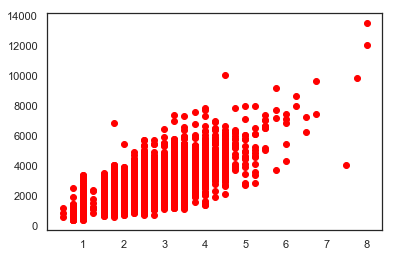

In [702]:
#Question 1: what's the relationship between categorical data like bathroom with sqft_living? 

plt.scatter(df_mod.bathrooms, df_mod.sqft_living,color='red', marker='o')
plt.show()



The above shows a linear trending relationship. as expected, the bigger the house, the more the bathrooms. One could argue that they are very well correlated.

In [703]:
#Question 2: what if we add additional best features, what would be included if n=6?
select_n=RFE(linreg, n_features_to_select=6)
select_n=select_n.fit(X,np.ravel(y))
selected_columns=X.columns[select_n.support_]
print(selected_columns)
print(select_n.estimator_.coef_)


Index(['waterfront', 'sqft_living', 'yr_built', 'lat', 'long', 'zipcode'], dtype='object')
[0.1094229  0.14495238 0.01077953 0.01438727 0.02321314 0.03018416]


looks like the northern one lives in Kings county, the more valuable it is. and the year of the building also plays a role: the older built seems to be more valuable than the newer ones.

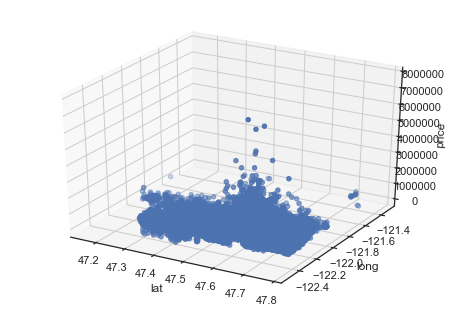

In [704]:
#question 3: is the northern houses really that more valuable? what would a 3d relationship look like>
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_mod.lat, df_mod.long, df_mod.price, marker='o')
ax.set_xlabel('lat')
ax.set_ylabel('long')
ax.set_zlabel('price')

plt.show()

none conclusive

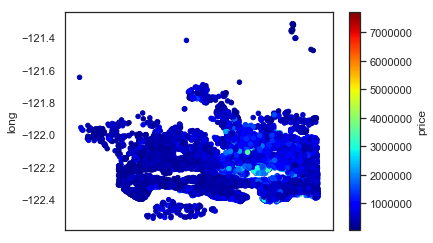

In [705]:
df_mod.plot.scatter('lat', 'long', c='price', colormap='jet')

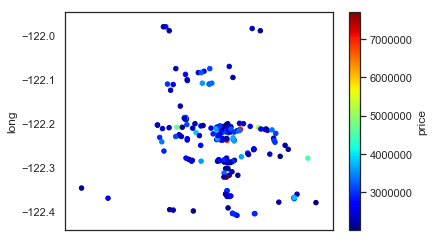

In [707]:

df_mod[df_mod['price'] > 2000000].plot.scatter('lat', 'long', c='price', colormap='jet')